Testing multifits loading and using `gettp` on multiple files.

In [26]:
import numpy as np
import matplotlib.pyplot as plt

from astropy.io import fits

from dysh.fits.gbtfitsload import GBTFITSLoad

In [2]:
# Point it to the testdata directory on the root dysh directory.
#testdata = "/home/mpound/src/dysh/testdata"
testdata = "/home/sandboxes/psalas/Dysh/dysh/testdata"
# The folder with multiple SDFITS files.
data_path = f"{testdata}/AGBT18B_354_03.raw.vegas"

In [3]:
sdf = GBTFITSLoad(data_path, verbose=False)

In [4]:
sdf.summary()

,SCAN,OBJECT,VELOCITY,PROC,PROCSEQN,RESTFREQ,DOPFREQ,# IF,# POL,# INT,# FEED,AZIMUTH,ELEVATIO
0,6,W49N,7.0,OffOn,1,45.077148,44.979549,4,2,4,1,128.090129,50.305025
1,7,W49N,7.0,OffOn,2,45.077148,44.979549,4,2,4,1,129.920889,50.435658


In [15]:
ifnums = np.sort(sdf.udata("IFNUM"))
np.sum(np.subtract(ifnums, [0,1,2,3]))

0

In [21]:
len(sdf.udata("FDNUM"))

1

In [25]:
ps_scans = sdf.getps(6, ifnum=2)

FILE  /home/sandboxes/psalas/Dysh/dysh/testdata/AGBT18B_354_03.raw.vegas/AGBT18B_354_03.raw.vegas.A.fits
FILE  /home/sandboxes/psalas/Dysh/dysh/testdata/AGBT18B_354_03.raw.vegas/AGBT18B_354_03.raw.vegas.A.fits
FILE  /home/sandboxes/psalas/Dysh/dysh/testdata/AGBT18B_354_03.raw.vegas/AGBT18B_354_03.raw.vegas.B.fits
FILE  /home/sandboxes/psalas/Dysh/dysh/testdata/AGBT18B_354_03.raw.vegas/AGBT18B_354_03.raw.vegas.C.fits
FILE  /home/sandboxes/psalas/Dysh/dysh/testdata/AGBT18B_354_03.raw.vegas/AGBT18B_354_03.raw.vegas.D.fits


/home/sandboxes/psalas/Dysh/dysh/src/dysh/spectra/core.py:340: RuntimeWarning: Mean of empty slice
  meandiff = np.nanmean(calon[chrng]) - np.nanmean(caloff[chrng])


In [29]:
ps_spec = ps_scans[0].calibrated(0)

In [38]:
hdu[1].data["TSYS"]

array([73.76717377], dtype='>f8')

In [37]:
ps_spec.meta

{'OBJECT': 'W49N',
 'BANDWID': 187500000.0,
 'DATE-OBS': '2019-11-08T19:20:47.50',
 'DURATION': 4.99821235,
 'EXPOSURE': 4.898248195648193,
 'TSYS': 73.76770436889262,
 'TDIM7': '(131072,1,1,1)',
 'TUNIT7': 'Counts',
 'CTYPE1': 'FREQ-OBS',
 'CRVAL1': 43961256248.0,
 'CRPIX1': 65537.0,
 'CDELT1': 1430.511474609375,
 'CTYPE2': 'RA',
 'CRVAL2': 287.55605377773014,
 'CTYPE3': 'DEC',
 'CRVAL3': 9.104158795184524,
 'CRVAL4': -2,
 'OBSERVER': 'Harshal Gupta',
 'OBSID': 'unknown',
 'SCAN': 7,
 'OBSMODE': 'OffOn:PSWITCHON:TPWCAL',
 'FRONTEND': 'Rcvr40_52',
 'TCAL': 9.192445,
 'VELDEF': 'RADI-LSR',
 'VFRAME': 4885.067170571789,
 'RVSYS': 11885.148889218093,
 'OBSFREQ': 43961256248.0,
 'LST': 61935.59854665421,
 'AZIMUTH': 129.84936079201256,
 'ELEVATIO': 50.40150959288692,
 'TAMBIENT': 271.71,
 'PRESSURE': 696.979269496545,
 'HUMIDITY': 0.495,
 'RESTFREQ': 43963039500.0,
 'FREQRES': 1430.511474609375,
 'EQUINOX': 2000.0,
 'RADESYS': 'FK5',
 'TRGTLONG': 287.5549999999999,
 'TRGTLAT': 9.1033333333

In [30]:
hdu = fits.open(f"{data_path}/getps_scan_6_ifnum_2_plnum_0_intnum_0.fits")
gbtidl_spec = hdu[1].data["DATA"]

In [31]:
ps_spec.flux.to("K").value - gbtidl_spec

array([[           nan, 1.21593475e-05, 1.90734863e-05, ...,
        2.16960907e-05, 1.64508820e-05, 1.09672546e-05]], dtype=float32)

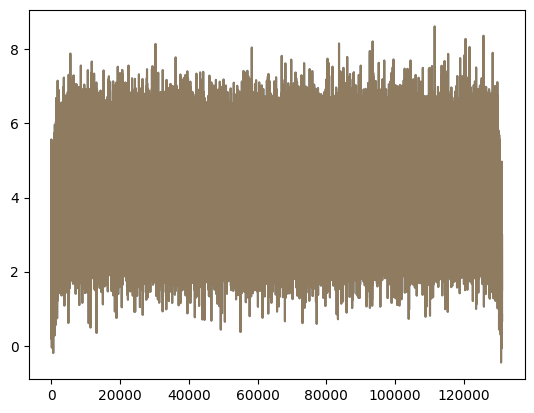

In [36]:
plt.figure()
plt.plot(gbtidl_spec[0])
plt.plot(ps_spec.flux.to("K").value, alpha=0.5)

In [7]:
ta = ps_scans.timeaverage()

In [13]:
ta[0].flux

<Quantity [nan, nan, nan, ..., nan, nan, nan] K>

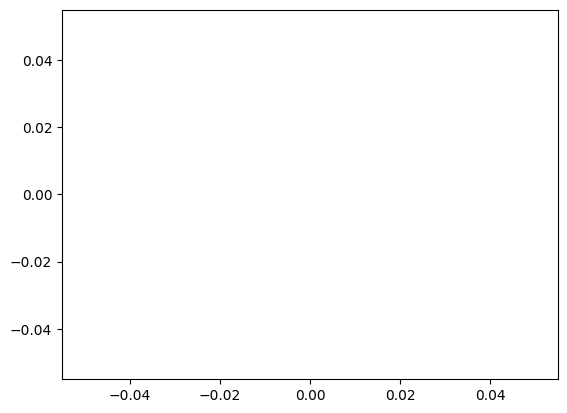

In [12]:
plt.figure()
plt.plot(ta[0].flux)

In [5]:
df=sdf._index[sdf._index["SCAN"].isin([6,7])]
dfon = sdf.select("_OBSTYPE", "PSWITCHON", df)
dfoff = sdf.select("_OBSTYPE", "PSWITCHOFF", df)


In [6]:
df["PROC"]

0      OffOn
1      OffOn
2      OffOn
3      OffOn
4      OffOn
       ...  
123    OffOn
124    OffOn
125    OffOn
126    OffOn
127    OffOn
Name: PROC, Length: 128, dtype: object

Up to this point, it works fine. It tells you there are multiple IFs (spectral windows).

Now, when we try to calibrate something, it breaks down.

In [7]:
dfon

,OBJECT,BANDWID,DATE-OBS,DURATION,EXPOSURE,TSYS,TDIM7,TUNIT7,CTYPE1,CRVAL1,...,CALPOSITION,IFNUM,PLNUM,FDNUM,HDU,BINTABLE,ROW,PROC,_OBSTYPE,_SUBOBSMODE
16,W49N,187500000.0,2019-11-08T19:20:47.50,4.998212,4.898248,1.0,"(131072,1,1,1)",Counts,FREQ-OBS,4.396126e+10,...,Unknown,2,0,0,1,0,16,OffOn,PSWITCHON,TPWCAL
17,W49N,187500000.0,2019-11-08T19:20:47.50,4.998212,4.942289,1.0,"(131072,1,1,1)",Counts,FREQ-OBS,4.396126e+10,...,Unknown,2,0,0,1,0,17,OffOn,PSWITCHON,TPWCAL
18,W49N,187500000.0,2019-11-08T19:20:47.50,4.998212,4.898248,1.0,"(131072,1,1,1)",Counts,FREQ-OBS,4.396126e+10,...,Unknown,2,1,0,1,0,18,OffOn,PSWITCHON,TPWCAL
19,W49N,187500000.0,2019-11-08T19:20:47.50,4.998212,4.942289,1.0,"(131072,1,1,1)",Counts,FREQ-OBS,4.396126e+10,...,Unknown,2,1,0,1,0,19,OffOn,PSWITCHON,TPWCAL
20,W49N,187500000.0,2019-11-08T19:20:57.50,4.998212,4.880772,1.0,"(131072,1,1,1)",Counts,FREQ-OBS,4.396126e+10,...,Unknown,2,0,0,1,0,20,OffOn,PSWITCHON,TPWCAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,W49N,187500000.0,2019-11-08T19:21:07.49,4.998212,4.942289,1.0,"(131072,1,1,1)",Counts,FREQ-OBS,4.675383e+10,...,Unknown,3,1,0,1,0,27,OffOn,PSWITCHON,TPWCAL
124,W49N,187500000.0,2019-11-08T19:21:16.99,4.998212,0.030059,1.0,"(131072,1,1,1)",Counts,FREQ-OBS,4.675383e+10,...,Unknown,3,0,0,1,0,28,OffOn,PSWITCHON,TPWCAL
125,W49N,187500000.0,2019-11-08T19:21:16.99,4.998212,0.000000,1.0,"(131072,1,1,1)",Counts,FREQ-OBS,4.675383e+10,...,Unknown,3,0,0,1,0,29,OffOn,PSWITCHON,TPWCAL
126,W49N,187500000.0,2019-11-08T19:21:16.99,4.998212,0.030059,1.0,"(131072,1,1,1)",Counts,FREQ-OBS,4.675383e+10,...,Unknown,3,1,0,1,0,30,OffOn,PSWITCHON,TPWCAL


In [8]:
dfoff

,OBJECT,BANDWID,DATE-OBS,DURATION,EXPOSURE,TSYS,TDIM7,TUNIT7,CTYPE1,CRVAL1,...,CALPOSITION,IFNUM,PLNUM,FDNUM,HDU,BINTABLE,ROW,PROC,_OBSTYPE,_SUBOBSMODE
0,W49N,187500000.0,2019-11-08T19:19:55.50,4.998212,4.901044,1.0,"(131072,1,1,1)",Counts,FREQ-OBS,4.396126e+10,...,Unknown,2,0,0,1,0,0,OffOn,PSWITCHOFF,TPWCAL
1,W49N,187500000.0,2019-11-08T19:19:55.50,4.998212,4.942289,1.0,"(131072,1,1,1)",Counts,FREQ-OBS,4.396126e+10,...,Unknown,2,0,0,1,0,1,OffOn,PSWITCHOFF,TPWCAL
2,W49N,187500000.0,2019-11-08T19:19:55.50,4.998212,4.901044,1.0,"(131072,1,1,1)",Counts,FREQ-OBS,4.396126e+10,...,Unknown,2,1,0,1,0,2,OffOn,PSWITCHOFF,TPWCAL
3,W49N,187500000.0,2019-11-08T19:19:55.50,4.998212,4.942289,1.0,"(131072,1,1,1)",Counts,FREQ-OBS,4.396126e+10,...,Unknown,2,1,0,1,0,3,OffOn,PSWITCHOFF,TPWCAL
4,W49N,187500000.0,2019-11-08T19:20:05.50,4.998212,4.872383,1.0,"(131072,1,1,1)",Counts,FREQ-OBS,4.396126e+10,...,Unknown,2,0,0,1,0,4,OffOn,PSWITCHOFF,TPWCAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,W49N,187500000.0,2019-11-08T19:20:15.49,4.998212,4.942289,1.0,"(131072,1,1,1)",Counts,FREQ-OBS,4.675383e+10,...,Unknown,3,1,0,1,0,11,OffOn,PSWITCHOFF,TPWCAL
108,W49N,187500000.0,2019-11-08T19:20:24.99,4.998212,0.030059,1.0,"(131072,1,1,1)",Counts,FREQ-OBS,4.675383e+10,...,Unknown,3,0,0,1,0,12,OffOn,PSWITCHOFF,TPWCAL
109,W49N,187500000.0,2019-11-08T19:20:24.99,4.998212,0.000000,1.0,"(131072,1,1,1)",Counts,FREQ-OBS,4.675383e+10,...,Unknown,3,0,0,1,0,13,OffOn,PSWITCHOFF,TPWCAL
110,W49N,187500000.0,2019-11-08T19:20:24.99,4.998212,0.030059,1.0,"(131072,1,1,1)",Counts,FREQ-OBS,4.675383e+10,...,Unknown,3,1,0,1,0,14,OffOn,PSWITCHOFF,TPWCAL


In [9]:
df.columns

Index(['OBJECT', 'BANDWID', 'DATE-OBS', 'DURATION', 'EXPOSURE', 'TSYS',
       'TDIM7', 'TUNIT7', 'CTYPE1', 'CRVAL1', 'CRPIX1', 'CDELT1', 'CTYPE2',
       'CRVAL2', 'CTYPE3', 'CRVAL3', 'CRVAL4', 'OBSERVER', 'OBSID', 'SCAN',
       'OBSMODE', 'FRONTEND', 'TCAL', 'VELDEF', 'VFRAME', 'RVSYS', 'OBSFREQ',
       'LST', 'AZIMUTH', 'ELEVATIO', 'TAMBIENT', 'PRESSURE', 'HUMIDITY',
       'RESTFREQ', 'FREQRES', 'EQUINOX', 'RADESYS', 'TRGTLONG', 'TRGTLAT',
       'SAMPLER', 'FEED', 'SRFEED', 'FEEDXOFF', 'FEEDEOFF', 'SUBREF_STATE',
       'SIDEBAND', 'PROCSEQN', 'PROCSIZE', 'PROCSCAN', 'PROCTYPE', 'LASTON',
       'LASTOFF', 'TIMESTAMP', 'QD_XEL', 'QD_EL', 'QD_BAD', 'QD_METHOD',
       'VELOCITY', 'ZEROCHAN', 'DOPFREQ', 'ADCSAMPF', 'VSPDELT', 'VSPRVAL',
       'VSPRPIX', 'SIG', 'CAL', 'CALTYPE', 'TWARM', 'TCOLD', 'CALPOSITION',
       'IFNUM', 'PLNUM', 'FDNUM', 'HDU', 'BINTABLE', 'ROW', 'PROC', '_OBSTYPE',
       '_SUBOBSMODE'],
      dtype='object')

In [10]:
ps_scans = sdf.getps(6, ifnum=2)

onoff_scan_list(scans=6,if=2,pl=0,bintable=None,fitsindex=0)
FILE  /home/mpound/src/dysh/testdata/AGBT18B_354_03.raw.vegas/AGBT18B_354_03.raw.vegas.A.fits
1 df[proc]: 0     OffOn
1     OffOn
2     OffOn
3     OffOn
4     OffOn
5     OffOn
6     OffOn
7     OffOn
8     OffOn
9     OffOn
10    OffOn
11    OffOn
12    OffOn
13    OffOn
14    OffOn
15    OffOn
16    OffOn
17    OffOn
18    OffOn
19    OffOn
20    OffOn
21    OffOn
22    OffOn
23    OffOn
24    OffOn
25    OffOn
26    OffOn
27    OffOn
28    OffOn
29    OffOn
30    OffOn
31    OffOn
Name: PROC, dtype: object
2 df[proc]: 0     OffOn
1     OffOn
4     OffOn
5     OffOn
8     OffOn
9     OffOn
12    OffOn
13    OffOn
16    OffOn
17    OffOn
20    OffOn
21    OffOn
24    OffOn
25    OffOn
28    OffOn
29    OffOn
Name: PROC, dtype: object
PROCSET  {'OffOn'}
LEN df  16
   OBJECT      BANDWID                DATE-OBS  DURATION  EXPOSURE  TSYS  \
0    W49N  187500000.0  2019-11-08T19:19:55.50  4.998212  4.901044   1.0   
1    W49N  

/home/mpound/src/dysh/src/dysh/spectra/core.py:333: RuntimeWarning: Mean of empty slice
  meandiff = np.nanmean(calon[chrng]) - np.nanmean(caloff[chrng])
/home/mpound/src/dysh/src/dysh/fits/gbtfitsload.py:984: UserWarning: no on/off scans found for given selection
  warnings.warn("no on/off scans found for given selection")
/home/mpound/src/dysh/src/dysh/spectra/core.py:333: RuntimeWarning: Mean of empty slice
  meandiff = np.nanmean(calon[chrng]) - np.nanmean(caloff[chrng])
/home/mpound/src/dysh/src/dysh/fits/gbtfitsload.py:984: UserWarning: no on/off scans found for given selection
  warnings.warn("no on/off scans found for given selection")
/home/mpound/src/dysh/src/dysh/spectra/core.py:333: RuntimeWarning: Mean of empty slice
  meandiff = np.nanmean(calon[chrng]) - np.nanmean(caloff[chrng])
/home/mpound/src/dysh/src/dysh/fits/gbtfitsload.py:984: UserWarning: no on/off scans found for given selection
  warnings.warn("no on/off scans found for given selection")
/home/mpound/src/dysh/

In [13]:
len(ps_scans)

4

In [11]:
tg = GBTFITSLoad("/home/mpound/src/dysh/testdata/AGBT18B_354_03.raw.vegas/AGBT18B_354_03.raw.vegas.B.fits")
tg.summary()

,SCAN,OBJECT,VELOCITY,PROC,PROCSEQN,RESTFREQ,DOPFREQ,# IF,# POL,# INT,# FEED,AZIMUTH,ELEVATIO
0,6.0,W49N,7.0,OffOn,1.0,44.610393,44.979549,1,2,4,1,128.090105,50.304993
1,7.0,W49N,7.0,OffOn,2.0,44.610393,44.979549,1,2,4,1,129.920963,50.43569


In [ ]:
list(set(df["PROC"]))[0]

In [ ]:
sdf.onoff_scan_list([6,7])

In [ ]:
# Check what is going wrong by looking at `GBTFITSLoad.onoff_scan_list`

# These are the defaults.
plnum = 0
ifnum = 0
df = sdf.index(bintable=None, fitsindex=0)
# df = df[(df["PLNUM"] == plnum) & (df["IFNUM"] == ifnum)]
# dfon = sdf.select("_OBSTYPE", "PSWITCHON", df)
# dfoff = sdf.select("_OBSTYPE", "PSWITCHOFF", df)
# onscans = uniq(list(dfon["SCAN"]))  # wouldn't set() do this too?
# offscans = uniq(list(dfoff["SCAN"]))

In [ ]:
df["IFNUM"]

The problem seems to be that while selecting the OffOn scans, it expects to find `ifnum=0`, but that is not part of the first file, so it crashes instead on moving on to the next file.